<a href="https://colab.research.google.com/github/DishaArsude/Tamizan-Skills-Internship-ML-AI-PROJECT-3/blob/main/Project_3_Loan_Eligibility_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



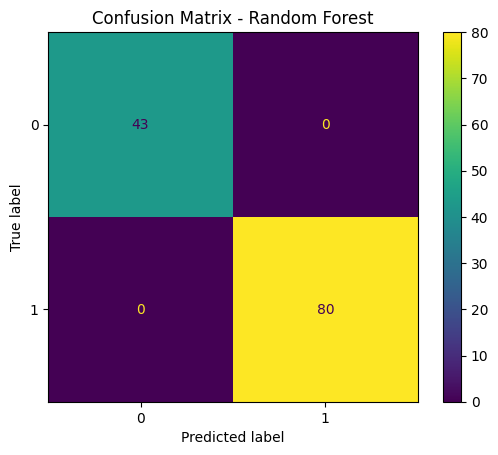

Submission file saved as 'loan_submission.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

# Store Loan_ID for final submission
test_ids = test_df['Loan_ID']

# Drop Loan_ID from both datasets
train_df.drop('Loan_ID', axis=1, inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)

# Encode target variable
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Combine train and test for consistent preprocessing
full_data = pd.concat([train_df.drop('Loan_Status', axis=1), test_df], axis=0)

# Label encode categorical columns
categorical_cols = full_data.select_dtypes(include='object').columns
for col in categorical_cols:
    full_data[col] = LabelEncoder().fit_transform(full_data[col].astype(str))

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
full_data_imputed = pd.DataFrame(imputer.fit_transform(full_data), columns=full_data.columns)

# Standardize the features
scaler = StandardScaler()
full_data_scaled = pd.DataFrame(scaler.fit_transform(full_data_imputed), columns=full_data.columns)

# Split back into train and test
X_train = full_data_scaled.iloc[:len(train_df)]
X_test = full_data_scaled.iloc[len(train_df):]
y_train = train_df['Loan_Status']

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Optional: Evaluate using train split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
rf_val_preds = rf_model.predict(X_val)
print("Random Forest Evaluation:\n", classification_report(y_val, rf_val_preds))
ConfusionMatrixDisplay(confusion_matrix(y_val, rf_val_preds)).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Create submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_ids,
    'Loan_Status': ['Y' if pred == 1 else 'N' for pred in rf_preds]
})

# Save the submission
submission.to_csv('loan_submission.csv', index=False)
print("Submission file saved as 'loan_submission.csv'")
